<a href="https://colab.research.google.com/github/CodeWithSridhar/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
import warnings
warnings.filterwarnings("ignore")

In [2]:
data='C:\\Users\\USER\\OneDrive\\Desktop\\project\\Bike-Sharing-Demand-Prediction-main\\SeoulBikeData.csv'

In [3]:
df = pd.read_csv(data, encoding = "ISO-8859-1")

In [4]:
df = df[::14]
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
14,01/12/2017,447,14,3.0,26,2.0,2000,-14.6,1.01,0.0,0.0,Winter,No Holiday,Yes
28,02/12/2017,89,4,-3.8,79,2.0,1167,-6.9,0.00,0.0,0.0,Winter,No Holiday,Yes
42,02/12/2017,489,18,5.5,53,1.5,1697,-3.3,0.00,0.0,0.0,Winter,No Holiday,Yes
56,03/12/2017,85,8,3.2,92,1.8,244,2.0,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8694,28/11/2018,287,6,2.6,33,1.5,1185,-12.0,0.00,0.0,0.0,Autumn,No Holiday,Yes
8708,28/11/2018,842,20,4.8,29,0.6,1756,-11.7,0.00,0.0,0.0,Autumn,No Holiday,Yes
8722,29/11/2018,595,10,3.9,28,0.6,1627,-12.9,0.49,0.0,0.0,Autumn,No Holiday,Yes
8736,30/11/2018,474,0,1.8,62,1.6,1411,-4.7,0.00,0.0,0.0,Autumn,No Holiday,Yes


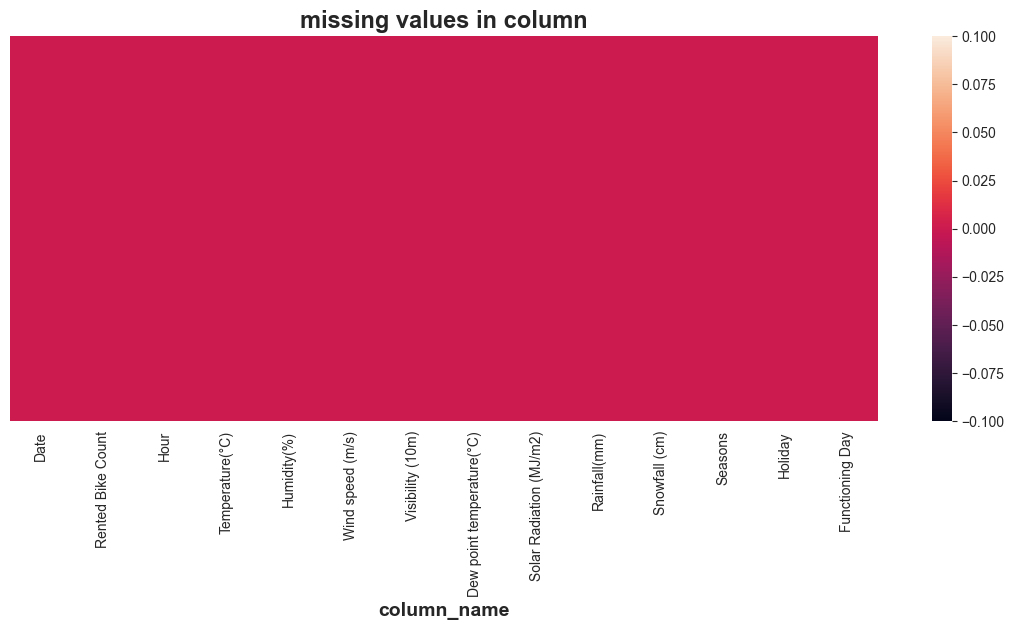

In [5]:
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

In [6]:
df.describe().transpose()      

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,626.0,615.015974,561.235220,0.0,177.25,435.50,918.75,2519.00
Hour,626.0,10.987220,6.913627,0.0,4.50,11.00,16.00,22.00
Temperature(°C),626.0,12.839776,11.950043,-15.7,3.20,13.60,22.20,37.40
Humidity(%),626.0,58.605431,20.467244,11.0,43.00,57.00,75.00,98.00
Wind speed (m/s),626.0,1.714058,1.006536,0.0,0.90,1.60,2.30,5.80
Visibility (10m),626.0,1432.931310,618.654328,54.0,899.25,1705.50,2000.00,2000.00
Dew point temperature(°C),626.0,4.071086,13.130672,-29.7,-4.30,4.95,15.00,26.60
Solar Radiation (MJ/m2),626.0,0.562428,0.856588,0.0,0.00,0.01,0.91,3.39
Rainfall(mm),626.0,0.161022,1.224137,0.0,0.00,0.00,0.00,21.00
Snowfall (cm),626.0,0.072204,0.419402,0.0,0.00,0.00,0.00,5.10


In [7]:
df['Date']= pd.to_datetime(df['Date'])

In [8]:
df['Date']=pd.to_datetime(df['Date'])
df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day_of_week'],axis=1)

<AxesSubplot: >

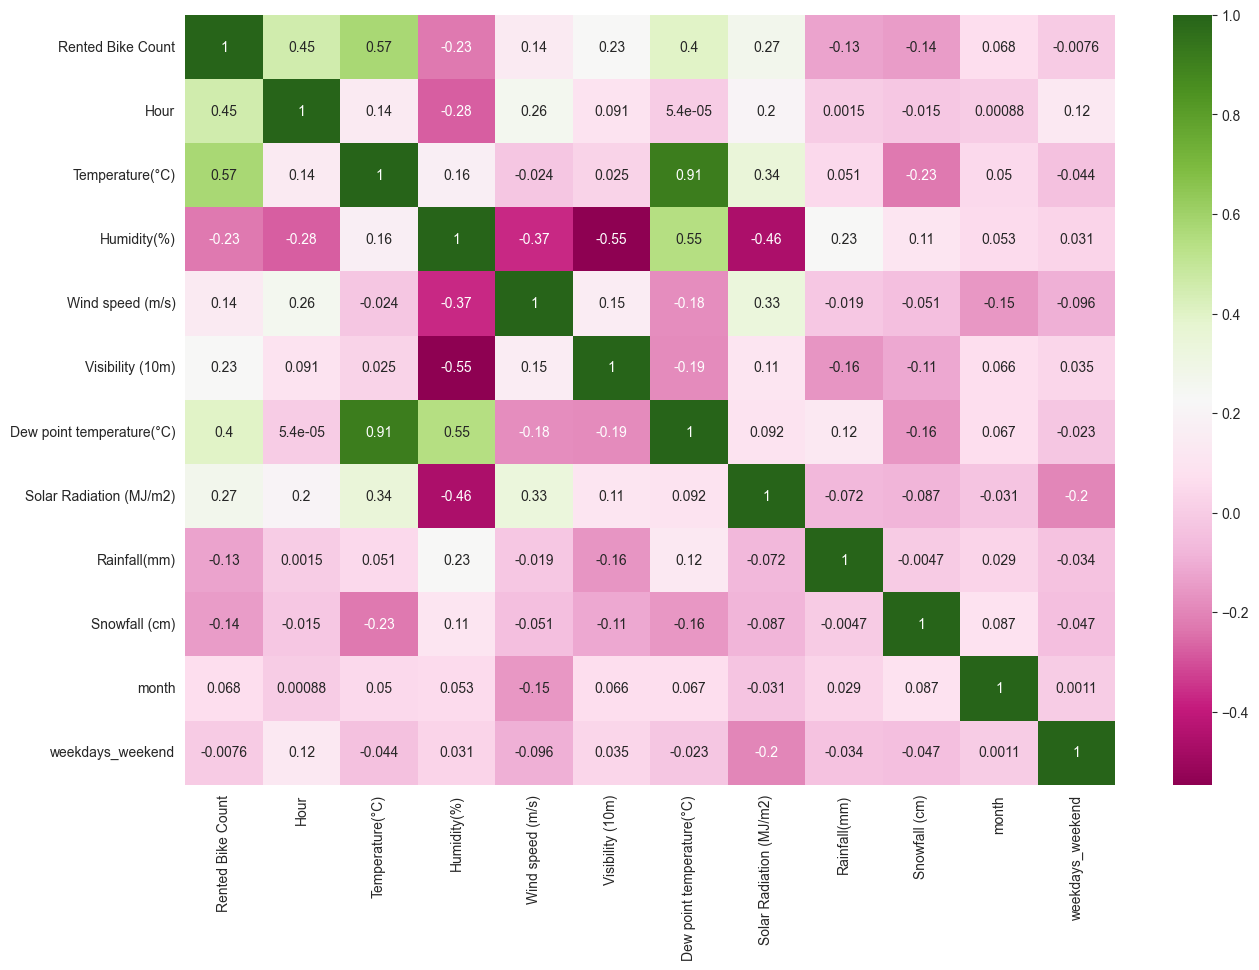

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='PiYG',annot=True)

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [11]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])

,variables,VIF
0,Hour,3.895255
1,Temperature(°C),3.173311
2,Humidity(%),6.080570
3,Wind speed (m/s),4.574331
4,Visibility (10m),5.296458
5,Solar Radiation (MJ/m2),2.267137
6,Rainfall(mm),1.080262
7,Snowfall (cm),1.142098
8,month,4.629524
9,weekdays_weekend,1.600927


In [12]:
numeric_features= df.select_dtypes(exclude='object')

In [13]:
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 8750
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          626 non-null    int64  
 1   Hour                       626 non-null    int64  
 2   Temperature(°C)            626 non-null    float64
 3   Humidity(%)                626 non-null    int64  
 4   Wind speed (m/s)           626 non-null    float64
 5   Visibility (10m)           626 non-null    int64  
 6   Dew point temperature(°C)  626 non-null    float64
 7   Solar Radiation (MJ/m2)    626 non-null    float64
 8   Rainfall(mm)               626 non-null    float64
 9   Snowfall (cm)              626 non-null    float64
 10  month                      626 non-null    int64  
 11  weekdays_weekend           626 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 58.8 KB


In [14]:
numeric_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,626.0,615.015974,561.235220,0.0,177.25,435.50,918.75,2519.00
Hour,626.0,10.987220,6.913627,0.0,4.50,11.00,16.00,22.00
Temperature(°C),626.0,12.839776,11.950043,-15.7,3.20,13.60,22.20,37.40
Humidity(%),626.0,58.605431,20.467244,11.0,43.00,57.00,75.00,98.00
Wind speed (m/s),626.0,1.714058,1.006536,0.0,0.90,1.60,2.30,5.80
Visibility (10m),626.0,1432.931310,618.654328,54.0,899.25,1705.50,2000.00,2000.00
Dew point temperature(°C),626.0,4.071086,13.130672,-29.7,-4.30,4.95,15.00,26.60
Solar Radiation (MJ/m2),626.0,0.562428,0.856588,0.0,0.00,0.01,0.91,3.39
Rainfall(mm),626.0,0.161022,1.224137,0.0,0.00,0.00,0.00,21.00
Snowfall (cm),626.0,0.072204,0.419402,0.0,0.00,0.00,0.00,5.10


In [15]:
categorical_features= df.select_dtypes(include='object')

In [16]:
categorical_features

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
14,Winter,No Holiday,Yes
28,Winter,No Holiday,Yes
42,Winter,No Holiday,Yes
56,Winter,No Holiday,Yes
...,...,...,...
8694,Autumn,No Holiday,Yes
8708,Autumn,No Holiday,Yes
8722,Autumn,No Holiday,Yes
8736,Autumn,No Holiday,Yes


 Conclusion
- Less demand on winter seasons
- Sligthly Higher demand during Non holidays
- Almost no demnad on non functioning day 

In [17]:
df['Functioning Day'].value_counts()

Yes    603
No      23
Name: Functioning Day, dtype: int64

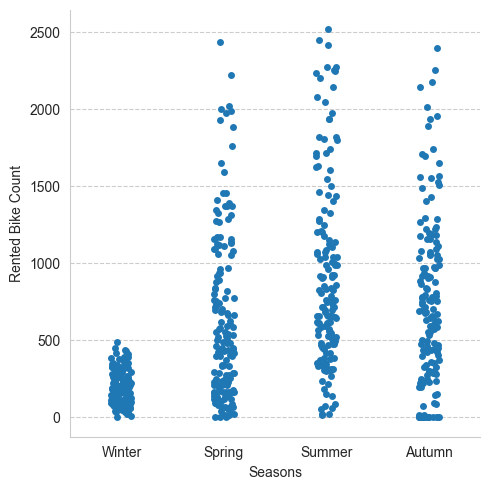

In [18]:
sns.catplot(x='Seasons',y='Rented Bike Count',data=df)

Conclusion

**we can clearly see that there is less demand of rented bike during winter season**

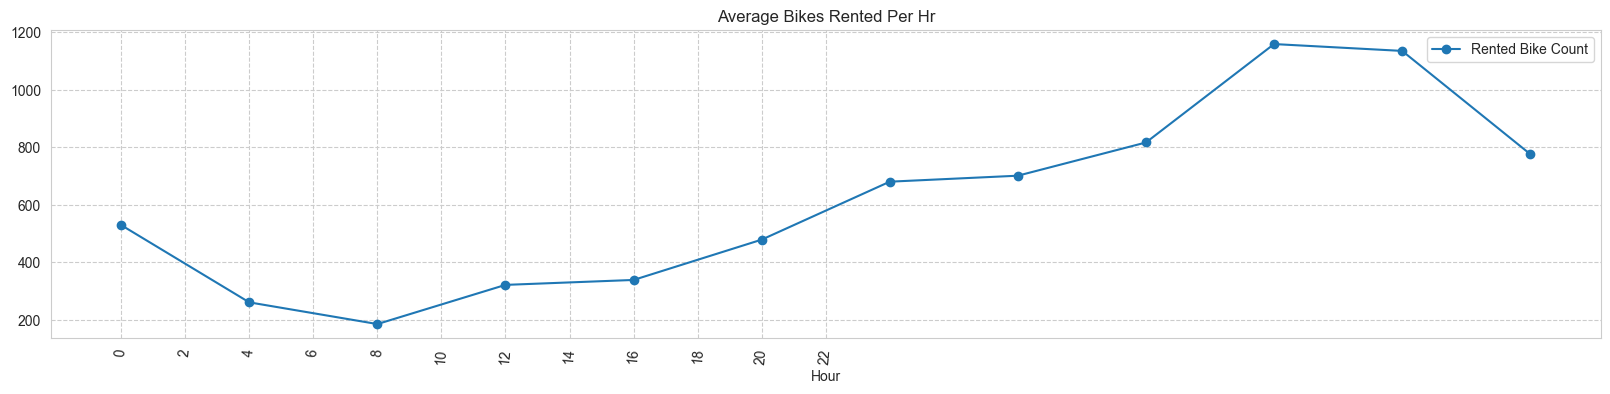

In [19]:
avg_rent_hrs = df.groupby('Hour')['Rented Bike Count'].mean()

plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);

In [20]:
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)

In [21]:
dummy_categorical_feature

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,0,1,1,1
14,0,0,1,1,1
28,0,0,1,1,1
42,0,0,1,1,1
56,0,0,1,1,1
...,...,...,...,...,...
8694,0,0,0,1,1
8708,0,0,0,1,1
8722,0,0,0,1,1
8736,0,0,0,1,1


In [22]:
final_df= pd.concat([dummy_categorical_feature,numeric_features],axis=1)

In [23]:
final_df.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekdays_weekend
0,0,0,1,1,1,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,1,0
14,0,0,1,1,1,447,14,3.0,26,2.0,2000,-14.6,1.01,0.0,0.0,1,0
28,0,0,1,1,1,89,4,-3.8,79,2.0,1167,-6.9,0.00,0.0,0.0,2,1
42,0,0,1,1,1,489,18,5.5,53,1.5,1697,-3.3,0.00,0.0,0.0,2,1
56,0,0,1,1,1,85,8,3.2,92,1.8,244,2.0,0.00,0.0,0.0,3,1


In [24]:
final_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Seasons_Spring,626.0,0.250799,0.433820,0.0,0.00,0.00,0.75,1.00
Seasons_Summer,626.0,0.252396,0.434735,0.0,0.00,0.00,1.00,1.00
Seasons_Winter,626.0,0.247604,0.431966,0.0,0.00,0.00,0.00,1.00
Holiday_No Holiday,626.0,0.950479,0.217126,0.0,1.00,1.00,1.00,1.00
Functioning Day_Yes,626.0,0.963259,0.188276,0.0,1.00,1.00,1.00,1.00
Rented Bike Count,626.0,615.015974,561.235220,0.0,177.25,435.50,918.75,2519.00
Hour,626.0,10.987220,6.913627,0.0,4.50,11.00,16.00,22.00
Temperature(°C),626.0,12.839776,11.950043,-15.7,3.20,13.60,22.20,37.40
Humidity(%),626.0,58.605431,20.467244,11.0,43.00,57.00,75.00,98.00
Wind speed (m/s),626.0,1.714058,1.006536,0.0,0.90,1.60,2.30,5.80


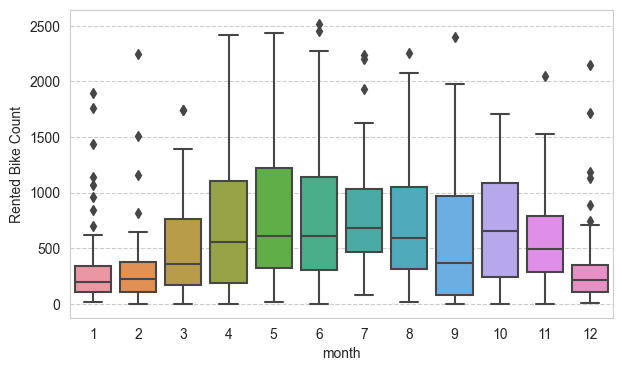

In [25]:
plt.figure(figsize=(7,4),dpi=100)
sns.boxplot(x='month',y='Rented Bike Count',data=df)
plt.show()

In [26]:
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [27]:
def train_linear_model (model,X_train,y_train,X_test,y_test):

  model.fit(X_train,y_train)

  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  print('\n================Evalution Matrix=========================\n')
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)  
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

## creating function to run diffirent models

In [28]:


def run_model(model,X_train,y_train,X_test,y_test):
    
    model.fit(X_train,y_train)
    
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    
    print('\n================Evalution Matrix=========================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    

    print('\
    ===============================================\
    Evalution Graph\
    ===============================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

## creating function to get feature importance 

In [29]:
def get_features_importance (optimal_model,X_train):

  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()


## lime tablular 

In [30]:

import lime
import lime.lime_tabular
def LimeTabularExplainer_table(model,instance,num_features,dependent_var):
  
  X=X_test
  feature_names =list(X_test.columns)

  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='regression')

  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict, num_features=num_features)
  exp.show_in_notebook(show_table=True)


In [31]:
X=final_df.drop(['Rented Bike Count'],axis=1)

In [32]:
X.shape

(626, 16)

In [33]:
y=np.sqrt(final_df['Rented Bike Count'])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [35]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# KNN and Tree Based Method

# Train | Test split Data For Tree based methods

In [36]:
X=final_df.drop(['Rented Bike Count'],axis=1)

In [37]:
y=final_df['Rented Bike Count']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# KNN Regression


In [39]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


================Evalution Matrix=========================

MSE : 98605.89350318472
RMSE : 314.01575359077884
R2 : 0.7085775584757932

================Evalution Matrix=========================

    ===============================================    Evalution Graph    ===============================================



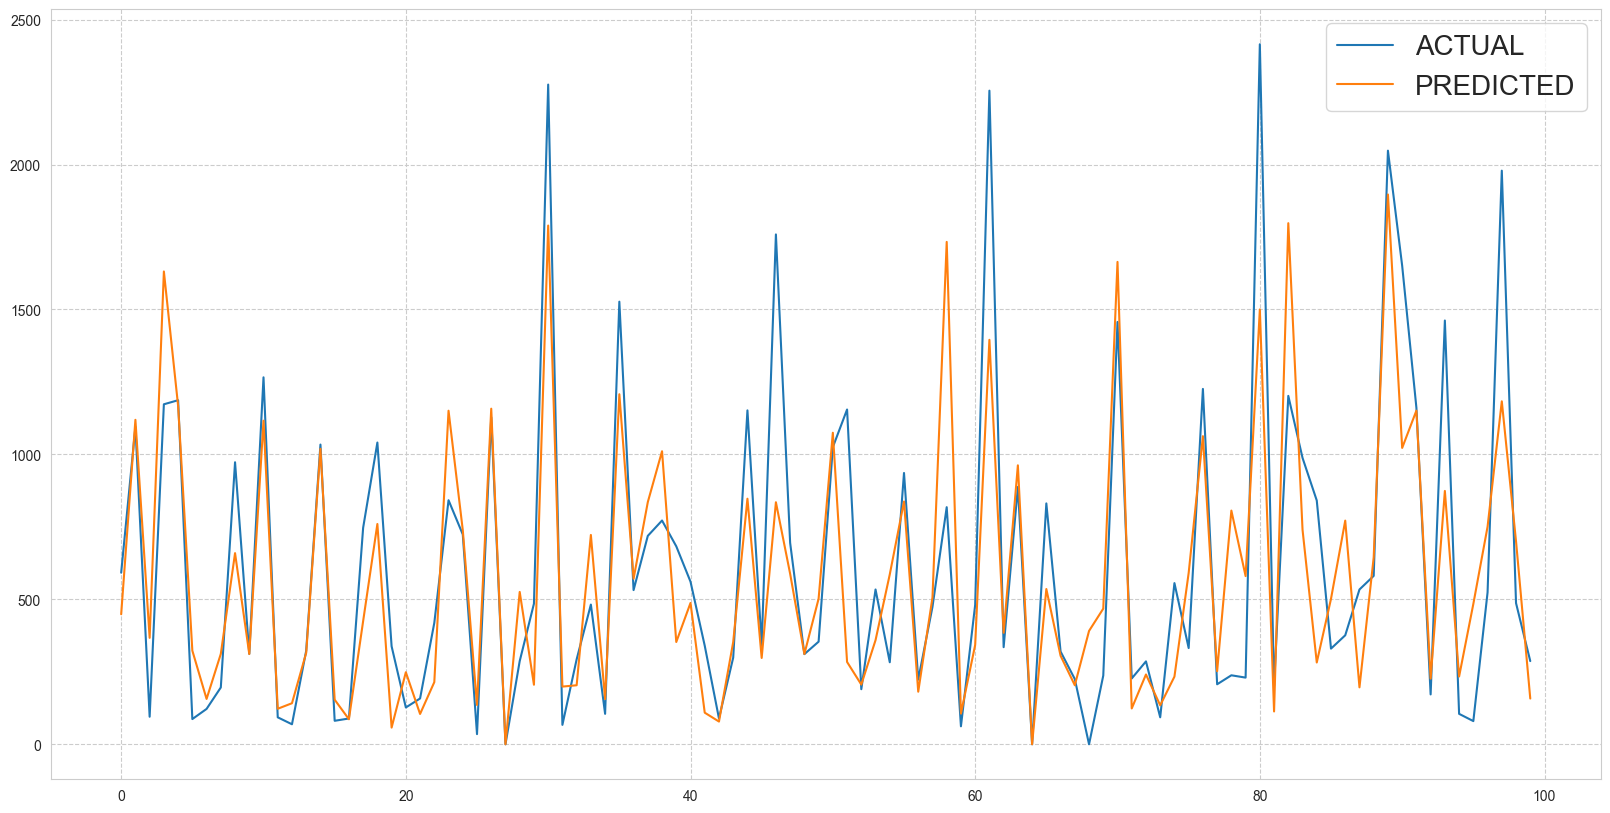

In [42]:
knn_model = KNeighborsRegressor(n_jobs=-1)

param_dict={'n_neighbors':[1,5,12]}
knn_grid= GridSearchCV(knn_model,param_grid=param_dict)

run_model(knn_grid,X_train_scaled,y_train,X_test_scaled,y_test)

# Decision Tree Regression

In [43]:
from sklearn.tree import DecisionTreeRegressor


================Evalution Matrix=========================

MSE : 60183.28025477707
RMSE : 245.32280826449275
R2 : 0.82213275649476

================Evalution Matrix=========================

    ===============================================    Evalution Graph    ===============================================



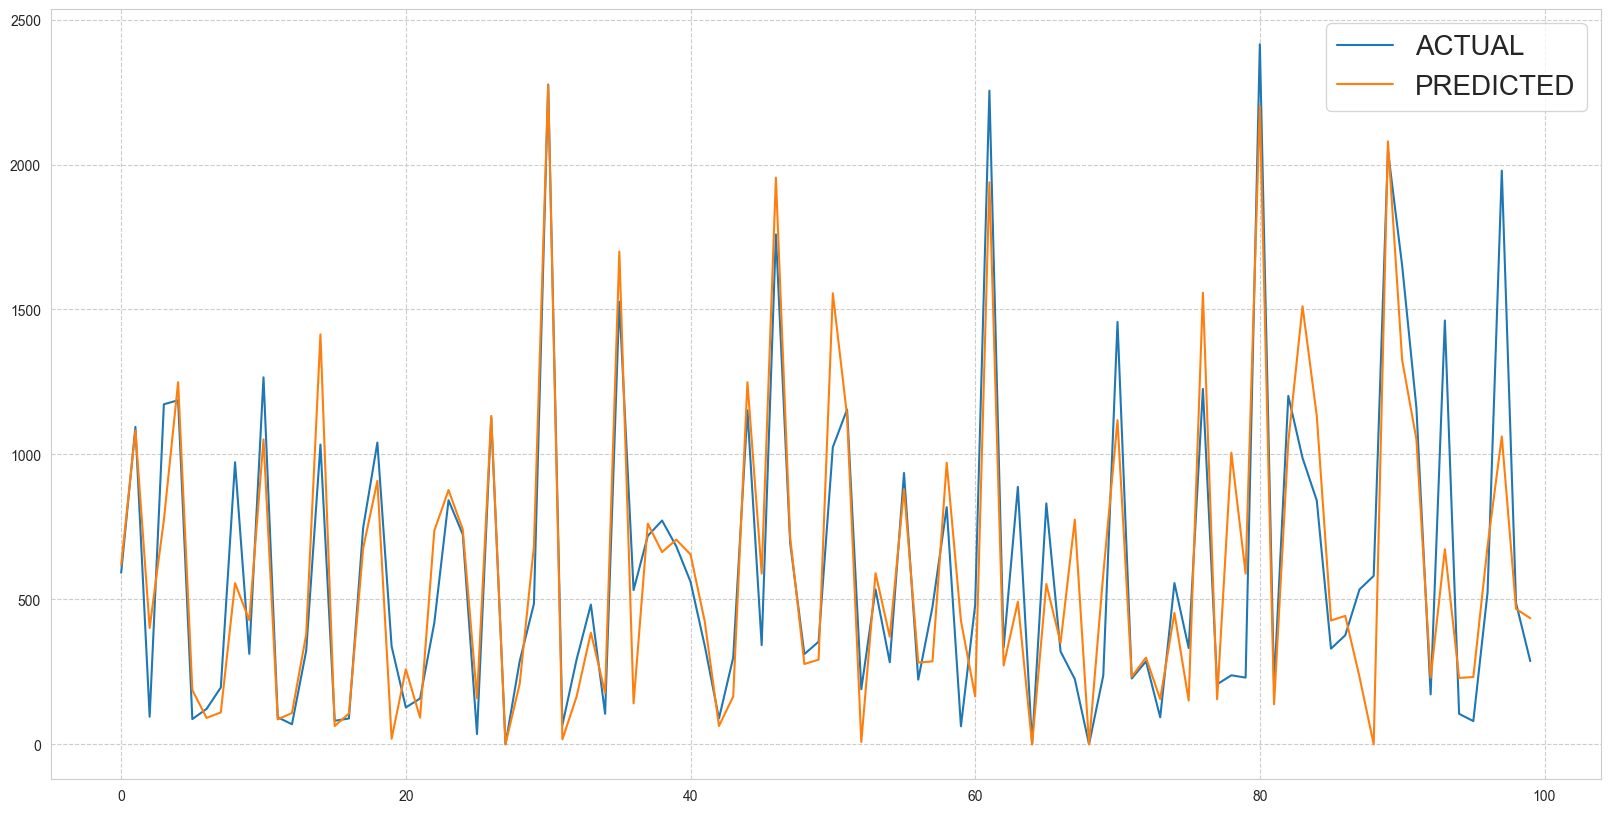

In [44]:
dt_model = DecisionTreeRegressor()
run_model(dt_model,X_train,y_train,X_test,y_test)

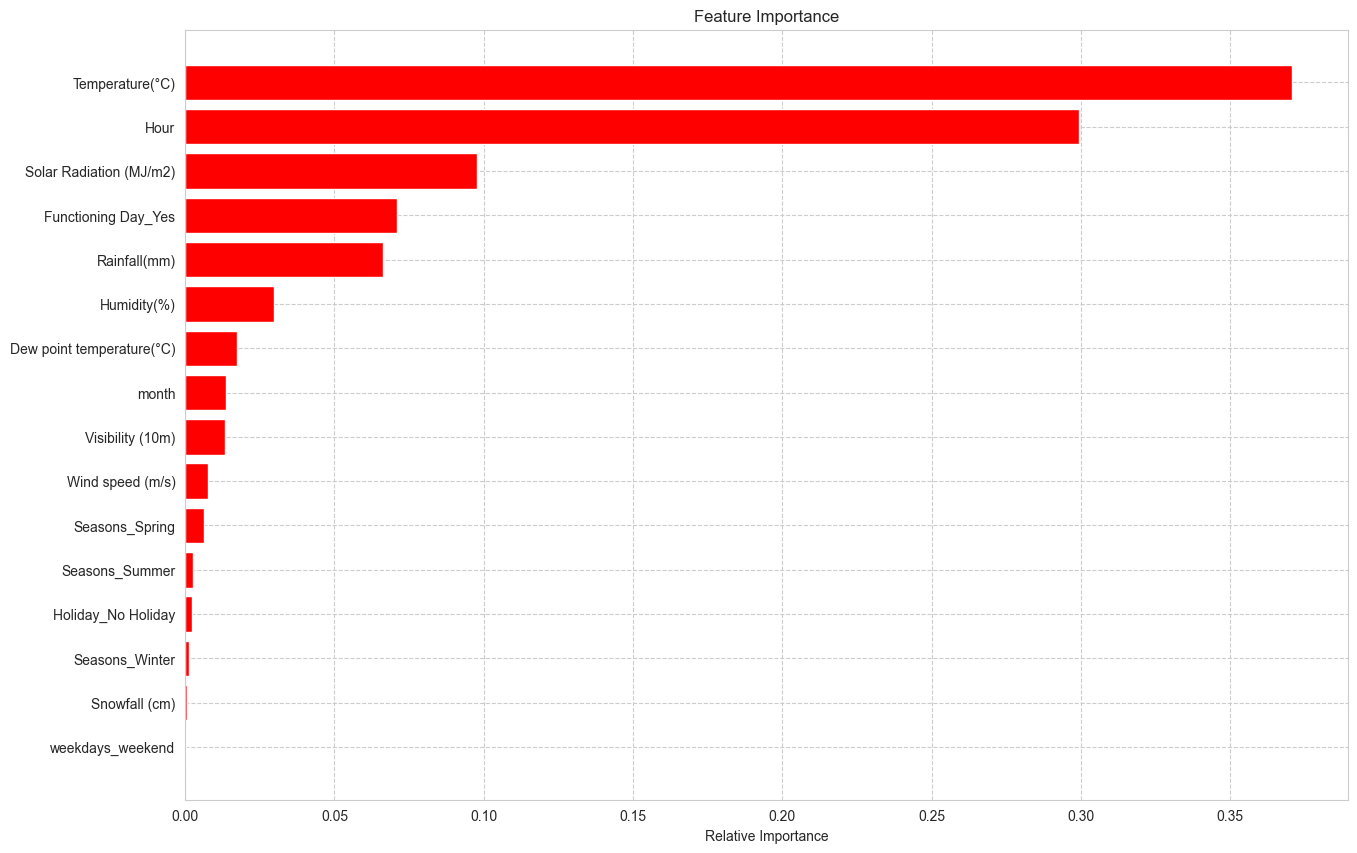

In [45]:
get_features_importance(dt_model,X_train)

# Random Forest

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
rf_model = RandomForestRegressor()


In [48]:
n_estimators=[60,80,100]
max_depth=[2,3,7]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [49]:
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 40799.7355520297
RMSE : 201.98944415991073
R2 : 0.8794193924348906

================Evalution Matrix=========================

    ===============================================    Evalution Graph    ===============================================



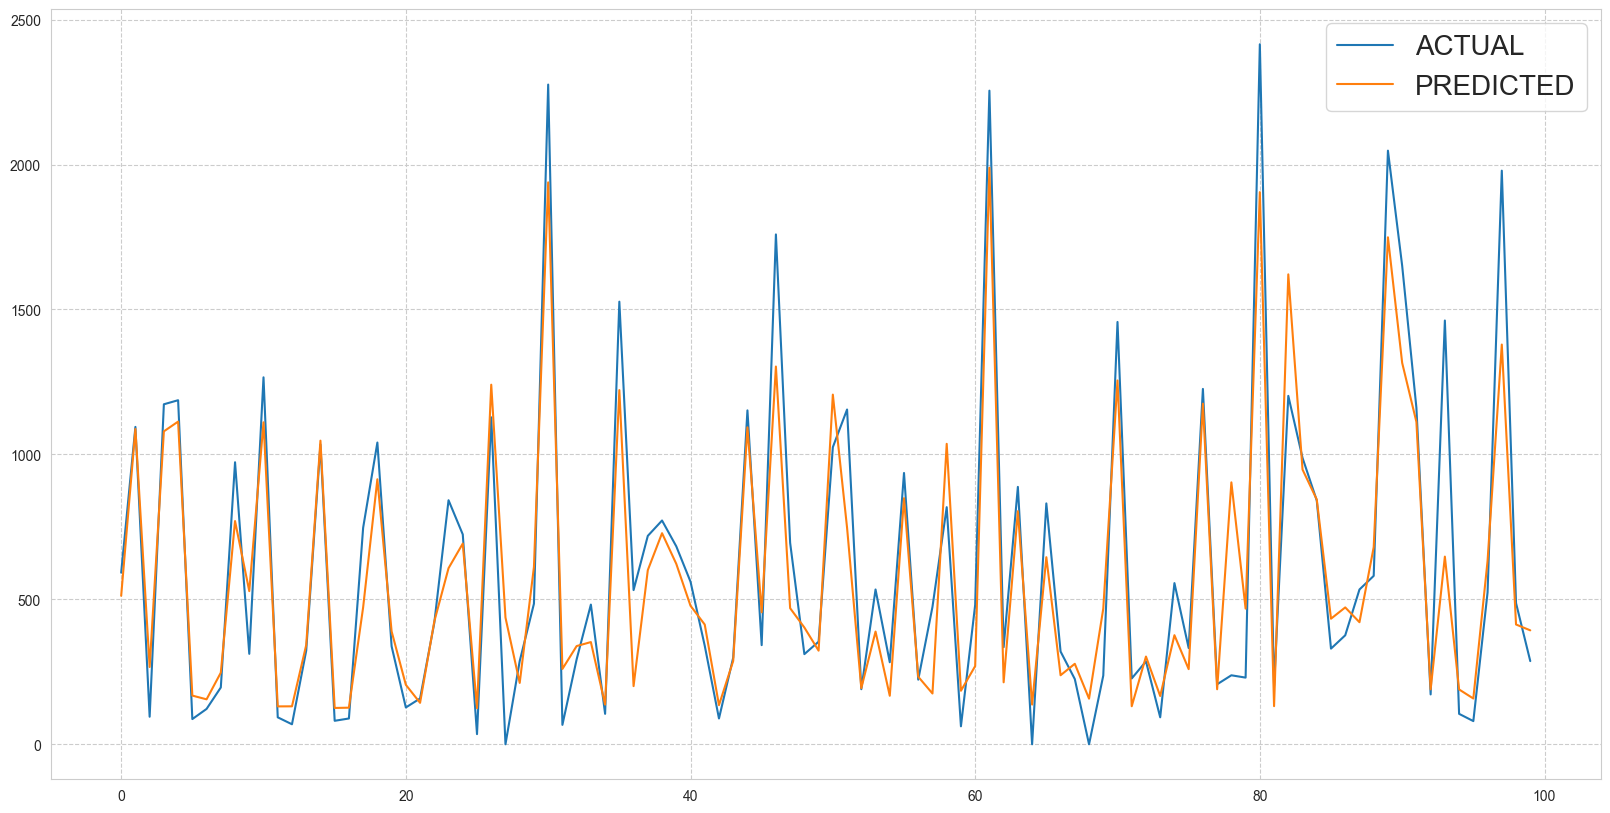

In [50]:
run_model(rf_grid,X_train,y_train,X_test,y_test)

In [51]:
optimal_rf_model=rf_grid.best_estimator_

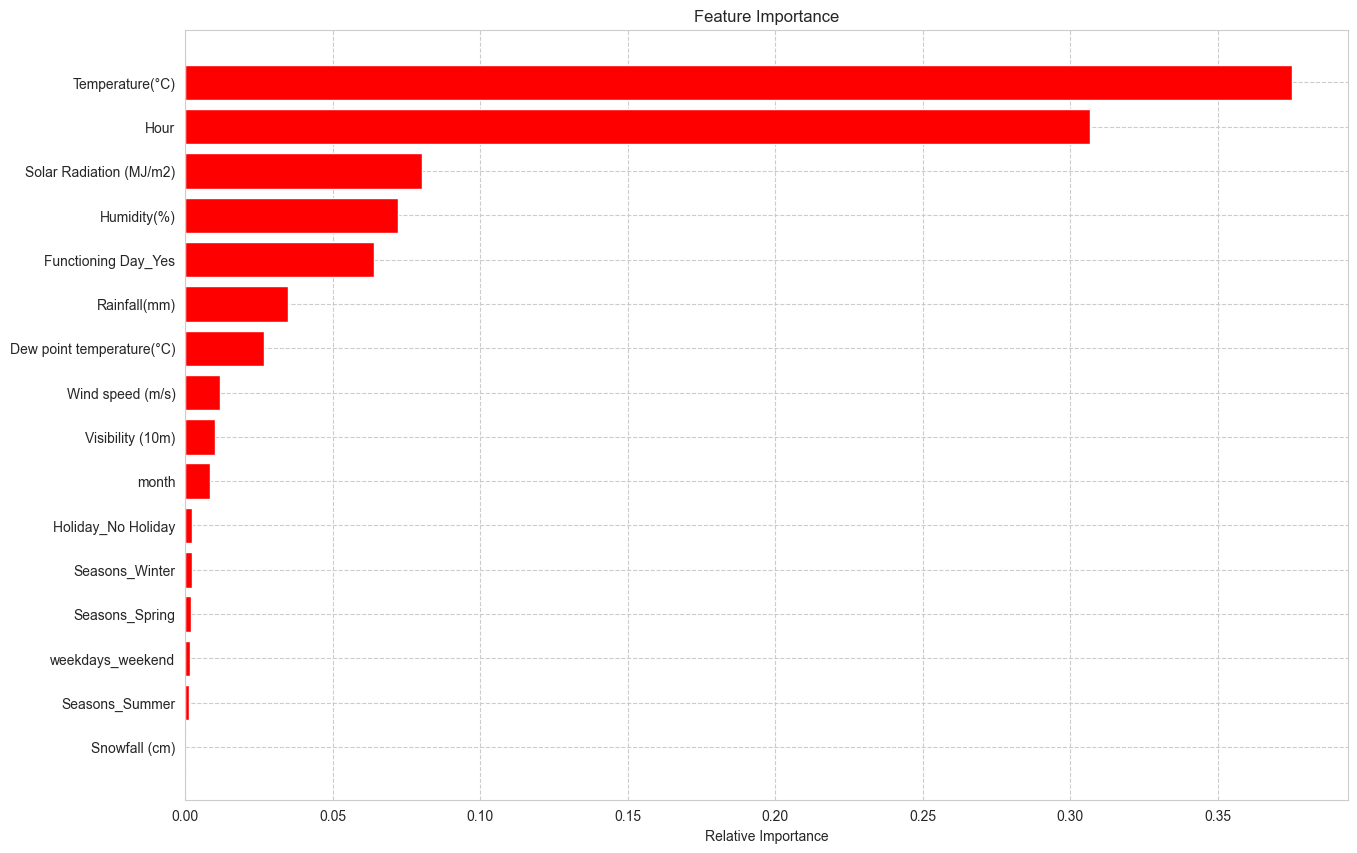

In [52]:
get_features_importance(optimal_rf_model,X_train)

# eXtreme Gradient Boosting

In [53]:
from xgboost import XGBRegressor

In [54]:
xgb_model=XGBRegressor()

In [55]:
n_estimators=[100,150,200]
max_depth=[5,9,11]


params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [56]:
xgb_grid= GridSearchCV(xgb_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 26694.565609676003
RMSE : 163.38471657311158
R2 : 0.9211061812938326

================Evalution Matrix=========================

    ===============================================    Evalution Graph    ===============================================



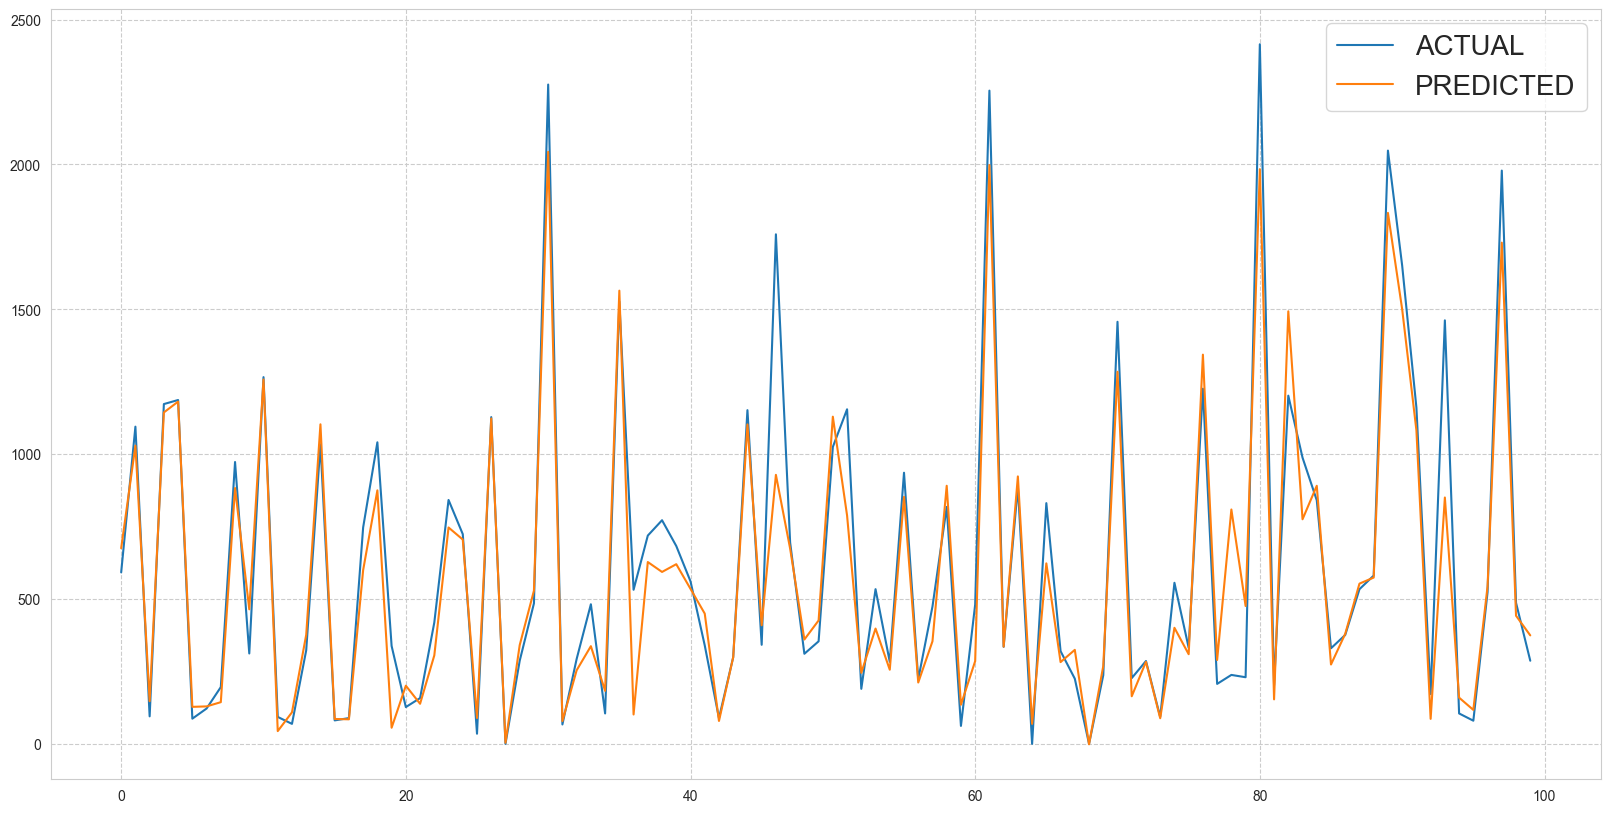

In [57]:
run_model(xgb_grid,X_train,y_train,X_test,y_test);

In [58]:
optimal_xgb_model=xgb_grid.best_estimator_

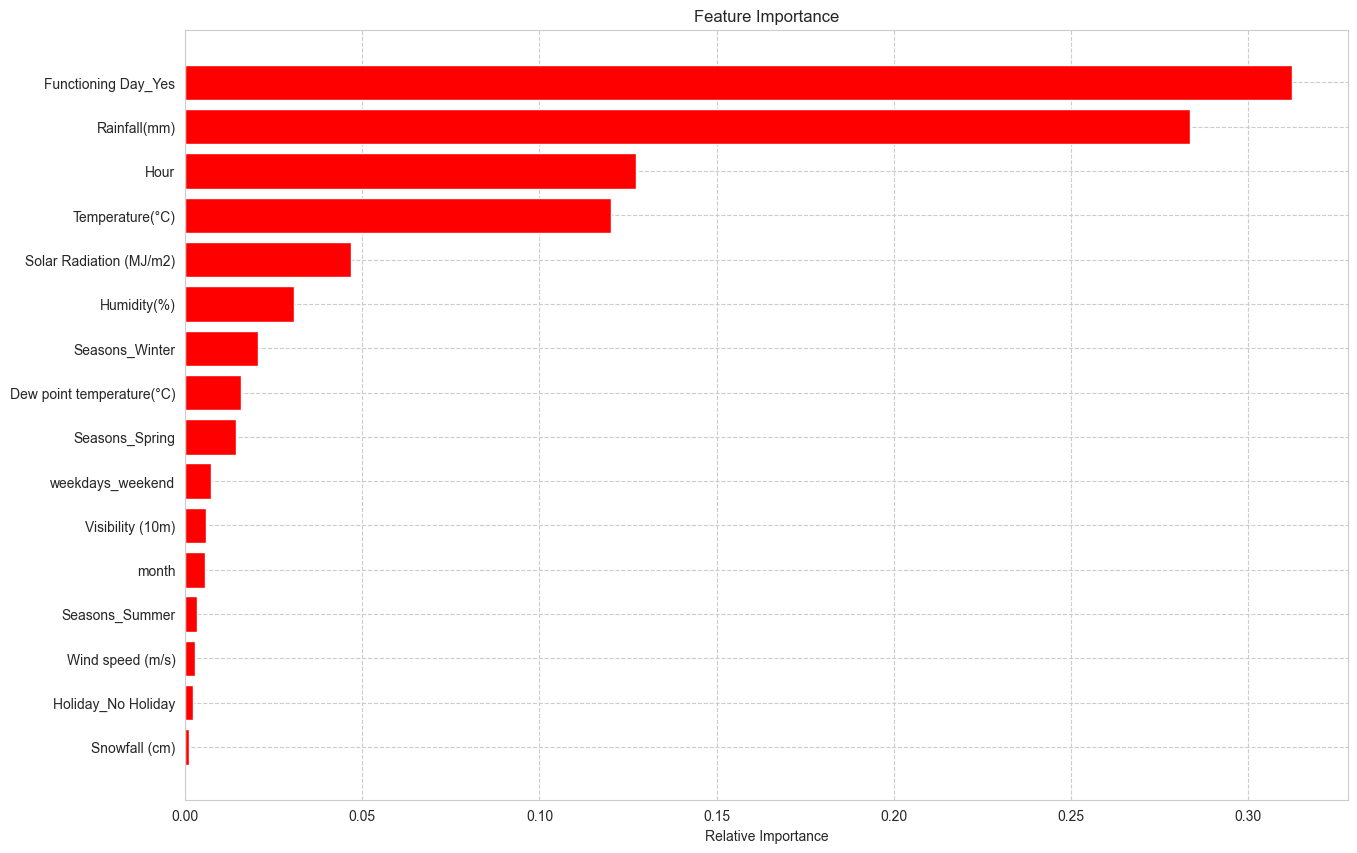

In [59]:
get_features_importance(optimal_xgb_model,X_train)

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
linear_model= LinearRegression()

In [81]:
from sklearn.pipeline import make_pipeline
#importing polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [82]:
pipe=make_pipeline(PolynomialFeatures(degree=1),LinearRegression())


================Evalution Matrix=========================

MSE : 968529452444.643
RMSE : 984138.9396038768
R2 : 0.40965472906264366

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



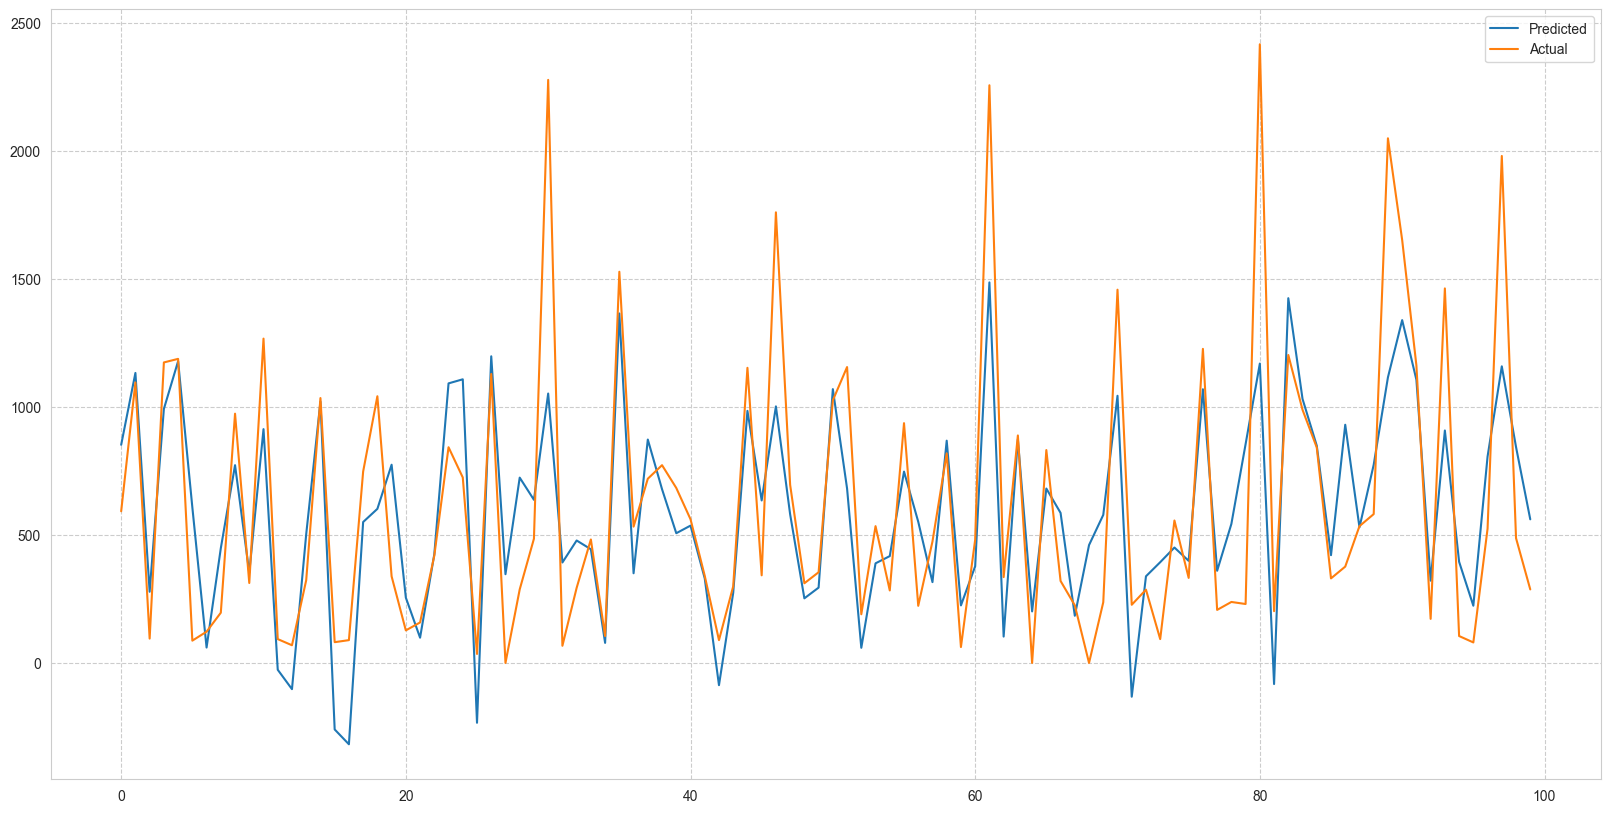

In [83]:
train_linear_model(pipe,X_train,y_train,X_test,y_test)